In [119]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [120]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
print(sns.__version__)
assert sns.__version__ >= "0.10"
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

0.11.2


In [121]:
train_set = pd.read_csv('data/train_set.csv',index_col=0) 
test_set = pd.read_csv('data/test_set.csv',index_col=0) 


# The problem
The machine learning is to predict the house price, but before that it is imporntat to study the dataset and its features



In [122]:
# print the dataset size
print("There is", train_set.shape[0], "samples")
print("Each sample has", train_set.shape[1], "features")

There is 5432 samples
Each sample has 21 features


In [124]:
# print the top elements from the dataset

train_set.head()



,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [125]:
print(train_set['YearBuilt'].isnull().values.ravel().sum())

print(train_set['YearBuilt'].value_counts().sort_index())





2130
1830.0     1
1854.0     1
1856.0     1
1860.0     1
1862.0     1
          ..
2014.0    46
2015.0    24
2016.0    23
2017.0     9
2018.0     1
Name: YearBuilt, Length: 121, dtype: int64


Suburb 292
Address 5400
Rooms 8
Type 3
Price 1458
Method 5
SellerG 203
Date 58
Distance 194
Postcode 187
Bedroom2 11
Bathroom 9
Car 10
Landsize 1131
BuildingArea 435
YearBuilt 121
CouncilArea 32
Lattitude 3568
Longtitude 3790
Regionname 8
Propertycount 289


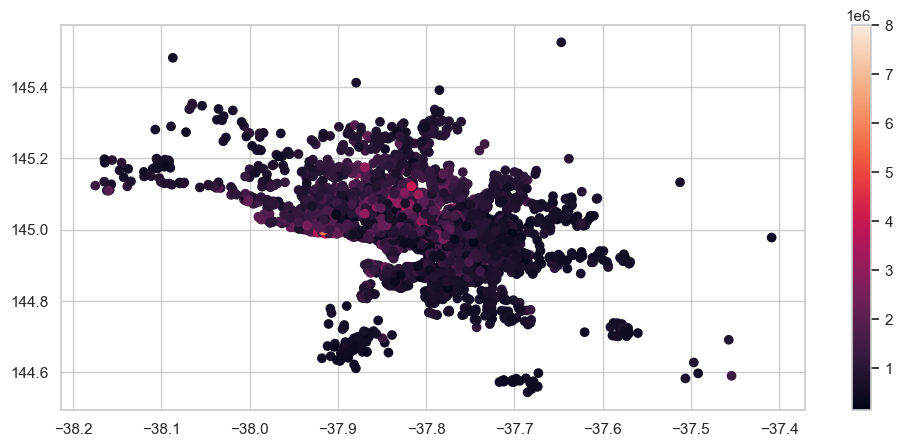

In [126]:
for i in train_set.columns:
    print(i, train_set[i].nunique())
    
plt.scatter(train_set['Lattitude'], train_set['Longtitude'], c=train_set['Price'])
plt.colorbar()



In [127]:
# As it can be seen the database contains several features, some of them numerical and some of them are categorical.
# It is important to check each of the to understand it.
len(set(train_set.Address))

5400

In [128]:
# we can see the type of each features as follows
train_set.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [129]:
# print those categorical features
train_set.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan


In [130]:
# We can check how many different type there is in the dataset using the folliwing line
train_set["Type"].value_counts()

h    3765
u    1191
t     476
Name: Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Type'>

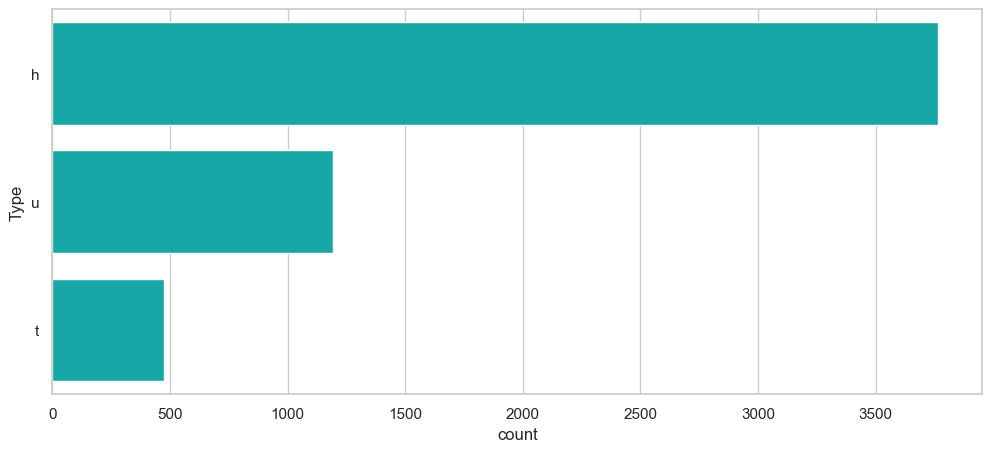

In [131]:
sns.countplot(y="Type", data=train_set, color="c")


It would be interesting to visualize all features (numerical and catergorical) in order to undertand them.

Check out this blog for plotting distribution: https://seaborn.pydata.org/tutorial/distributions.html

Seaborn version of this blog can be different from the one intalled in your machine (version 0.11 has been just realeased) Check out this blog for plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

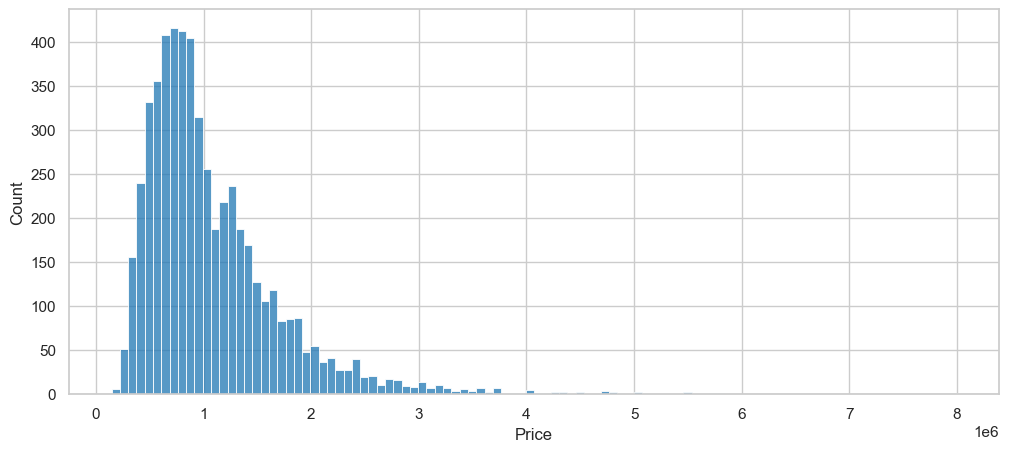

In [132]:
sns.histplot(train_set["Price"])
plt.show()

In [133]:
import datetime
format_str = '%d/%m/%Y' # The format
train_set["Year"]=[datetime.datetime.strptime(d, format_str).date().year for d in train_set.Date]
train_set["Month"]=[datetime.datetime.strptime(d, format_str).date().month for d in train_set.Date]
train_set["YearMonth"]=[str(y)+ "-" + str(m).zfill(2) for y,m in zip(train_set.Year,train_set.Month)]
train_set["YearMonth"]

index
0       2017-08
1       2017-05
2       2016-10
3       2016-05
4       2016-08
         ...   
5427    2016-08
5428    2017-08
5429    2016-08
5430    2016-04
5431    2016-07
Name: YearMonth, Length: 5432, dtype: object

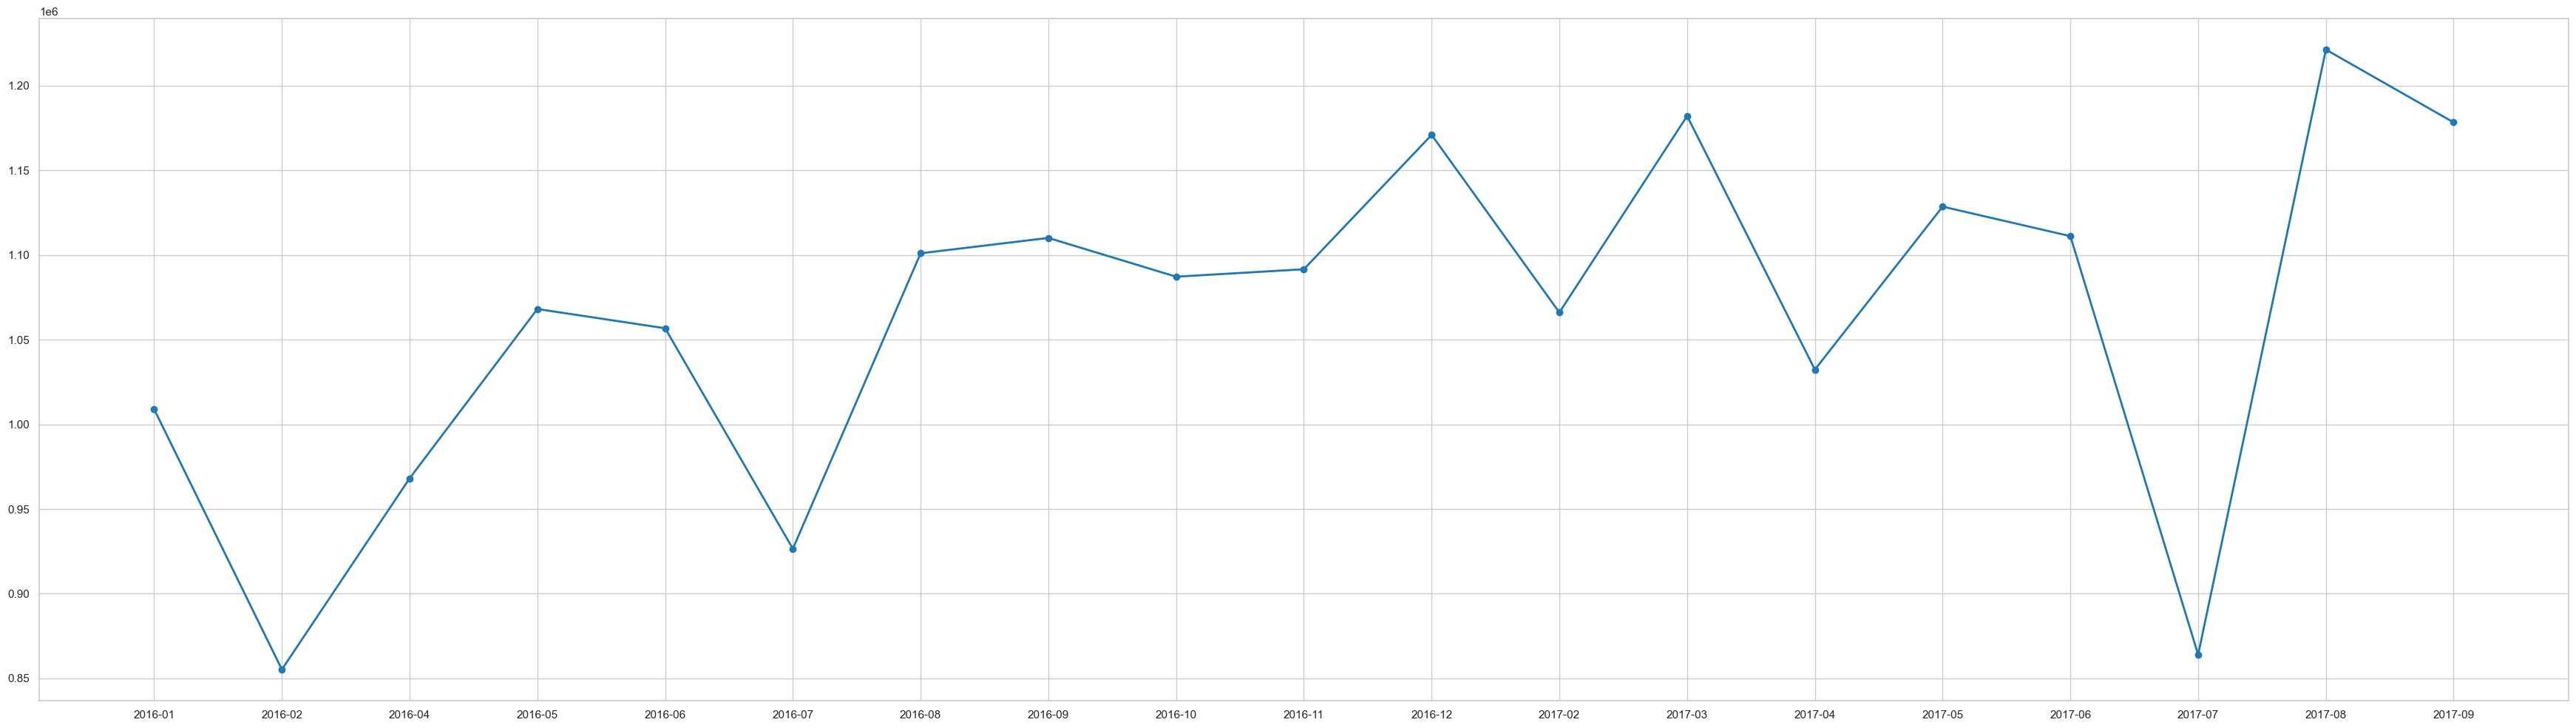

In [134]:
fig = plt.figure(figsize=(35,10))
df = train_set
values= df.groupby(df.YearMonth)["Price"].mean()
plt.plot(values,marker="o")


fig.tight_layout()

In [135]:
seller_list = train_set.groupby('SellerG').count().Suburb.reset_index()
seller_list.columns= ['SellerG', 'HousesSold']

seller_list
#plt.ylabel('# of houses sold')
#plt.plot(*seller_list)






,SellerG,HousesSold
0,@Realty,1
1,ASL,1
2,Abercromby's,11
3,Alexkarbon,16
4,Allens,2
...,...,...
198,buyMyplace,1
199,hockingstuart,478
200,hockingstuart/Barry,1
201,iSell,5


In [136]:
seller_mean_price = train_set.groupby('SellerG').mean().Price.reset_index()

seller_mean_price.columns = ['SellerG', 'SellerAvgPrice']

seller_mean_price



#plt.ylabel('avg price of house sold')
#plt.plot(seller_mean_price['SellerG'], seller_mean_price['Price'])



,SellerG,SellerAvgPrice
0,@Realty,7.250000e+05
1,ASL,7.055000e+05
2,Abercromby's,1.948273e+06
3,Alexkarbon,8.539375e+05
4,Allens,1.106700e+06
...,...,...
198,buyMyplace,8.650000e+05
199,hockingstuart,9.597002e+05
200,hockingstuart/Barry,1.265000e+06
201,iSell,6.978000e+05


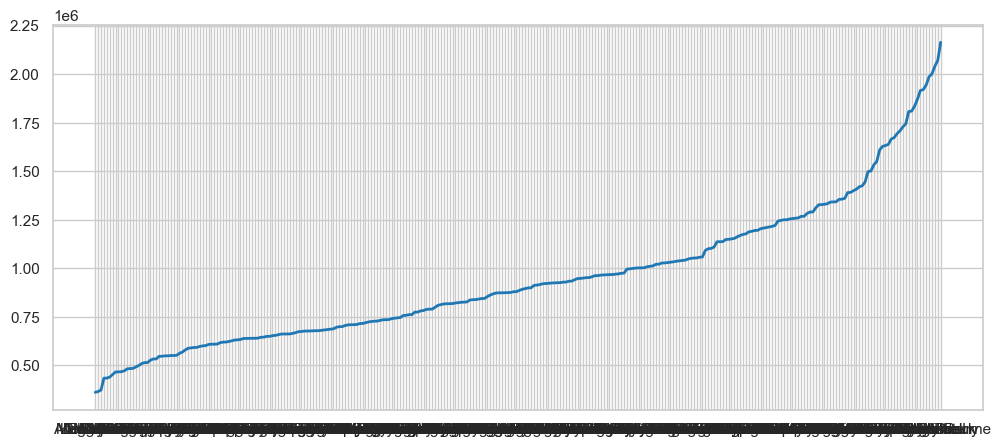

In [143]:
suburb_mean_price = train_set.groupby('Suburb').mean().Price.reset_index()

suburb_mean_price.columns = ['Suburb', 'SuburbAvgPrice']

suburb_mean_price = suburb_mean_price.sort_values(by = 'SuburbAvgPrice')

plt.plot(suburb_mean_price.Suburb, suburb_mean_price.SuburbAvgPrice)

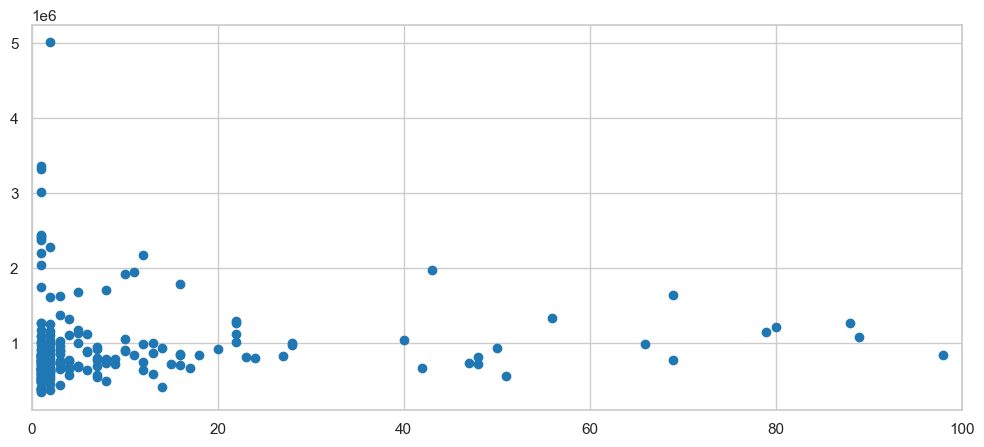

In [140]:
pricevsnumber = pd.merge(seller_list, seller_mean_price)
pricevsnumber

plt.xlim(left=0, right=100)
plt.scatter(pricevsnumber.HousesSold, pricevsnumber.SellerAvgPrice)

In [139]:
train_set = pd.merge(train_set, seller_mean_price, on = 'SellerG')

train_set = pd.merge(train_set, suburb_mean_price, on = 'Suburb')

train_set = train_set.drop(['Address', 'Postcode'], axis=1)

train_set



# using .get_dummies function to convert
# the categorical datatype to numerical
# and storing the returned dataFrame
# in a new variable df1
df1 = pd.get_dummies(df['Purchased'])
 
# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
df = pd.concat([df, df1], axis=1).reindex(df.index)
 
# removing the column 'Purchased' from df
# as it is of no use now.
df.drop('Purchased', axis=1, inplace=True)
 
# printing df
df

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,YearMonth,SellerAvgPrice,SuburbAvgPrice
0,Aberfeldie,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0,2017,8,2017-08,1.006166e+06,1.258381e+06
1,Aberfeldie,1,u,380000.0,S,Nelson,3/12/2016,9.1,1.0,1.0,1.0,0.0,39.0,1990.0,Moonee Valley,-37.75610,144.90280,Western Metropolitan,1543.0,2016,12,2016-12,1.006166e+06,1.258381e+06
2,Aberfeldie,4,h,1330000.0,S,Nelson,6/05/2017,9.1,4.0,2.0,2.0,273.0,NaN,NaN,Moonee Valley,-37.75740,144.89590,Western Metropolitan,1543.0,2017,5,2017-05,1.006166e+06,1.258381e+06
3,Aberfeldie,3,h,1300000.0,S,Nelson,8/04/2017,9.1,3.0,3.0,2.0,240.0,240.0,2013.0,Moonee Valley,-37.76200,144.89160,Western Metropolitan,1543.0,2017,4,2017-04,1.006166e+06,1.258381e+06
4,Aberfeldie,3,h,1195000.0,S,Nelson,9/09/2017,7.5,3.0,2.0,2.0,381.0,NaN,NaN,NaN,-37.75629,144.90626,Western Metropolitan,1543.0,2017,9,2017-09,1.006166e+06,1.258381e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,Hampton Park,4,h,625000.0,S,Rexhepi,26/08/2017,33.3,4.0,1.0,2.0,640.0,136.0,1960.0,NaN,-38.02981,145.24826,South-Eastern Metropolitan,8256.0,2017,8,2017-08,6.250000e+05,6.235000e+05
5428,Diamond Creek,2,h,621000.0,S,Mason,1/07/2017,21.8,2.0,1.0,0.0,610.0,61.0,1939.0,Nillumbik,-37.67629,145.15589,Northern Victoria,4258.0,2017,7,2017-07,6.832000e+05,6.830000e+05
5429,Diamond Creek,4,h,745000.0,S,Mason,9/09/2017,21.8,4.0,2.0,2.0,767.0,NaN,NaN,NaN,-37.67515,145.16550,Northern Victoria,4258.0,2017,9,2017-09,6.832000e+05,6.830000e+05
5430,Hurstbridge,5,h,790000.0,S,Mason,12/08/2017,26.1,5.0,2.0,2.0,1034.0,225.0,1985.0,Nillumbik,-37.63826,145.19910,Northern Victoria,1345.0,2017,8,2017-08,6.832000e+05,7.900000e+05


# BASELINE MODEL

This is a simple model that uses the K-nearest Neighbors Regressor

This model only uses 4 feaures: 'Rooms','Landsize', 'BuildingArea', 'YearBuilt'

----- EVALUATION ON TRAIN SET ------
RMSE 398979.18860008445
R^2:  0.6197370233507158


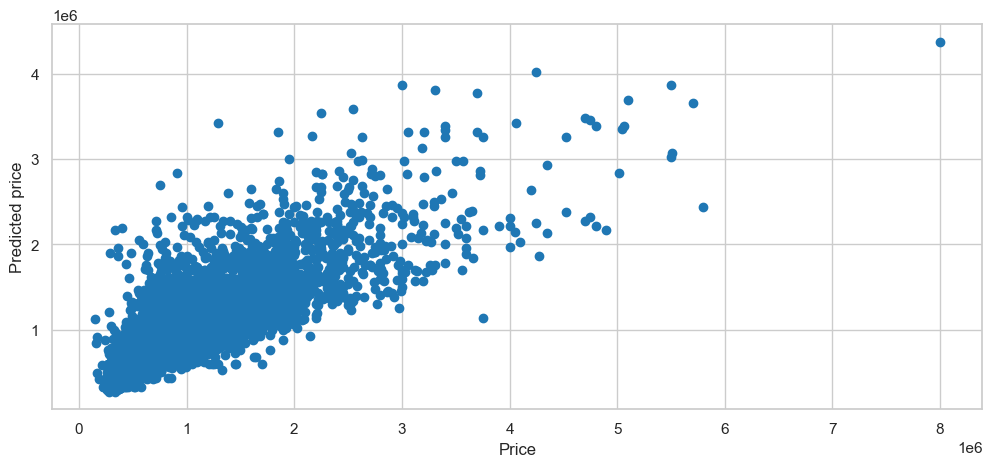

In [ ]:
## the features

features = ['Rooms','Landsize', 'BuildingArea', 'YearBuilt']
## DEFINE YOUR FEATURES
X = train_set[features].fillna(0)
y = train_set[['Price']]

## the model
# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)
model = neighbors.KNeighborsRegressor(n_neighbors)

## fit the model
model.fit(X, y)

## predict training set
y_pred = model.predict(X)

## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))


plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

## predict the test set and generate the submission file
X_test = test_set[features].fillna(0)
y_pred = model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('baseline.csv',index=False)

## EXERCICE - TRAIN A MODE, and upload your best solution to the Kaggle Challenge

Tasks: 
+ Clean and trasform the data
+ Choose the best features for the problem. Some features are numercial but others categorical, think how to codify all of them.
+ Choose the model. You have two choice: LinearRegression and KNeighborsRegressor
    + You can chanege the paramenter n_neighbors from the KNeighborsRegressor
    
LINEAR REGRESSOR:
>from sklearn.linear_model import LinearRegression

>model = LinearRegression()

KNeighborsRegressor
> from sklearn import neighbors

> n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)

> model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)


In [ ]:
## the features

## the model

## fit the model

## predict training set

## Evaluate the model and plot it

## predict the test set and generate the submission file

Explain the choosed model and why you think that is is the best:
